Reading the data and cleaning it

In [87]:
import pandas as pd
import matplotlib.pyplot as plt


In [88]:
#This tells pandas to read the file in one go and figure it out better:

Aviation_df=pd.read_csv("Aviation_Data.csv", low_memory=False)



Aviation_df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [89]:
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

Key Observations:
You have 90,348 rows and 31 columns.

Many columns like Latitude, Longitude, Aircraft.Category, etc. have a lot of missing values.

Most columns are of type object, and 5 are numerical (float64).



In [90]:
#checking Missing Data in Detail
Aviation_df.isnull().sum().sort_values(ascending=False)



Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2841
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

Droping  Columns With Too Much Missing Data
We’ll drop columns with more than 60% missing, since they are likely not usable:

In [91]:
Aviation_df.drop(['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Latitude', 'Longitude'], axis=1, inplace=True)


Confirm Remaining Columns
Check again which columns still have missing data (but less severe):

In [92]:
Aviation_df.isnull().sum().sort_values(ascending=False)


Airport.Code              40216
Airport.Name              37644
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8555
Report.Status              7843
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2841
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: int64

I  still have moderate missing data in several columns, especially:

Airport.Code, Airport.Name (missing  around 40k)

Injury data (Total.Serious.Injuries, Fatal, Minor)

Engine.Type, Purpose.of.flight, etc.

In [93]:
Aviation_df.drop(['Airport.Code', 'Airport.Name'], axis=1, inplace=True)


Am droppping Airport code and Airport name coz are of less importance in my analysis And fill Injury Columns ; fill missing with 0.0 since no data might mean no injuries:

In [94]:

#is risky because it might be working on a copy of the data, not the real DataFrame.
#So in the future, it won’t work the way you expect.
Aviation_df['Total.Fatal.Injuries'] = Aviation_df['Total.Fatal.Injuries'].fillna(0.0)
Aviation_df['Total.Serious.Injuries'] = Aviation_df['Total.Serious.Injuries'].fillna(0.0)
Aviation_df['Total.Minor.Injuries'] = Aviation_df['Total.Minor.Injuries'].fillna(0.0)
Aviation_df['Total.Uninjured'] = Aviation_df['Total.Uninjured'].fillna(0.0)


Categorical Columns – fill with "Unknown":

In [95]:
Aviation_df['Engine.Type'] = Aviation_df['Engine.Type'].fillna("Unknown")
Aviation_df['Purpose.of.flight'] = Aviation_df['Purpose.of.flight'].fillna("Unknown")
Aviation_df['Weather.Condition'] = Aviation_df['Weather.Condition'].fillna("Unknown")
Aviation_df['Aircraft.damage'] = Aviation_df['Aircraft.damage'].fillna("Unknown")
Aviation_df['Registration.Number'] = Aviation_df['Registration.Number'].fillna("Unknown")
Aviation_df['Injury.Severity'] = Aviation_df['Injury.Severity'].fillna("Unknown")
Aviation_df['Country'] = Aviation_df['Country'].fillna("Unknown")
Aviation_df['Amateur.Built'] = Aviation_df['Amateur.Built'].fillna("Unknown")
Aviation_df['Model'] = Aviation_df['Model'].fillna("Unknown")
Aviation_df['Make'] = Aviation_df['Make'].fillna("Unknown")
Aviation_df['Location'] = Aviation_df['Location'].fillna("Unknown")
Aviation_df['Report.Status'] = Aviation_df['Report.Status'].fillna("Unknown")
Aviation_df['Broad.phase.of.flight'] = Aviation_df['Broad.phase.of.flight'].fillna("Unknown")


Printed the first ten dates to see how it looks

In [96]:
print(Aviation_df['Event.Date'].head(10))


0    1948-10-24
1    1962-07-19
2    1974-08-30
3    1977-06-19
4    1979-08-02
5    1979-09-17
6    1981-08-01
7    1982-01-01
8    1982-01-01
9    1982-01-01
Name: Event.Date, dtype: object


Wanted to confirm the data type ,if its in the reall format of dates

In [97]:
print(Aviation_df['Event.Date'].dtype)


object


Saw some had unfilled date represented with NaN

In [98]:
print(Aviation_df['Event.Date'].sample(10))  # Random sample of 10 values


43693    1998-04-12
60238    2006-02-20
84393    2019-06-29
53516    2002-09-16
7780     1984-03-23
47934    2000-03-04
79667    2016-10-23
53847    2002-11-24
17143    1987-04-01
79273    2016-08-14
Name: Event.Date, dtype: object


Replaced the missing values with 2000-01-01

In [99]:
# Step 1: Convert to datetime, forcing invalid ones to NaT
Aviation_df['Event.Date'] = pd.to_datetime(Aviation_df['Event.Date'], errors='coerce')

# Step 2: Replace only the NaT values with placeholder
Aviation_df['Event.Date'] = Aviation_df['Event.Date'].fillna(pd.Timestamp('2000-01-01'))


Confirmed how many were replaced

In [100]:
print("Replaced missing dates:", (Aviation_df['Event.Date'] == '2000-01-01').sum())


Replaced missing dates: 1461


Convert Event.Date and Fill:

Final check of the data after cleaning

In [101]:
Aviation_df.isnull().sum().sort_values(ascending=False)


Publication.Date          16689
Number.of.Engines          7543
Event.Id                   1459
Accident.Number            1459
Event.Date                    0
Purpose.of.flight             0
Report.Status                 0
Broad.phase.of.flight         0
Weather.Condition             0
Total.Uninjured               0
Total.Minor.Injuries          0
Total.Serious.Injuries        0
Total.Fatal.Injuries          0
Engine.Type                   0
Location                      0
Investigation.Type            0
Model                         0
Make                          0
Registration.Number           0
Aircraft.damage               0
Injury.Severity               0
Country                       0
Amateur.Built                 0
dtype: int64

Want to drop Publication (date mainly used in reporting not safety ) and Unique identifiers (mainly for traceability but not analysis) and fill the number of enginees coz safety   sometimes depend on it

In [102]:
# Drop unnecessary columns
Aviation_df.drop(['Publication.Date', 'Event.Id', 'Accident.Number'], axis=1, inplace=True)

# Fill missing engine counts with 0 (or 'Unknown' if you want to treat them differently)
Aviation_df['Number.of.Engines'] = Aviation_df['Number.of.Engines'].fillna(0)


The final check of of my data

In [103]:
Aviation_df.isnull().sum().sort_values(ascending=False)


Investigation.Type        0
Event.Date                0
Broad.phase.of.flight     0
Weather.Condition         0
Total.Uninjured           0
Total.Minor.Injuries      0
Total.Serious.Injuries    0
Total.Fatal.Injuries      0
Purpose.of.flight         0
Engine.Type               0
Number.of.Engines         0
Amateur.Built             0
Model                     0
Make                      0
Registration.Number       0
Aircraft.damage           0
Injury.Severity           0
Country                   0
Location                  0
Report.Status             0
dtype: int64

Perfect now am good to go

In [104]:
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      90348 non-null  object        
 1   Event.Date              90348 non-null  datetime64[ns]
 2   Location                90348 non-null  object        
 3   Country                 90348 non-null  object        
 4   Injury.Severity         90348 non-null  object        
 5   Aircraft.damage         90348 non-null  object        
 6   Registration.Number     90348 non-null  object        
 7   Make                    90348 non-null  object        
 8   Model                   90348 non-null  object        
 9   Amateur.Built           90348 non-null  object        
 10  Number.of.Engines       90348 non-null  float64       
 11  Engine.Type             90348 non-null  object        
 12  Purpose.of.flight       90348 non-null  object

saving the cleaned data

In [105]:
# Step 3: Get unique values and their counts
purpose_counts = Aviation_df['Purpose.of.flight'].value_counts()
print(purpose_counts)

Purpose.of.flight
Personal                     49448
Unknown                      14453
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64


In [106]:
purpose_counts = Aviation_df['Engine.Type'].value_counts()
print(purpose_counts)

Engine.Type
Reciprocating      69530
Unknown            10606
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64


Saving in my project folder the cleaned data to use in tablue

Want to do the viasualization with the cleaned data

Correcting the data type for Make Column

 Replace None with appropriate text
"""
The two cases of inconsistent Make  naming are:

"Cessna" and "CESSNA" – These should be combined as they refer to the same Make.
 "piper" and " PIPER" – The second entry has a leading space and should be cleaned to match the first.

"""

In [107]:
# Your code here
# Strip leading/trailing spaces
Aviation_df["Make"] = Aviation_df["Make"].str.strip()
# Replace 'Marvel' with 'Marvel Comics'
Aviation_df["Make"] = Aviation_df["Make"].replace("Cessna", "CESSNA")
# Replace any remaining 'DC Comics' variants with consistent name
Aviation_df["Make"] = Aviation_df["Make"].replace("Piper", "PIPER")
Aviation_df["Make"] = Aviation_df["Make"].replace("Bell", "BELL")
Aviation_df["Make"] = Aviation_df["Make"].replace("Beech", "BEECH")
Aviation_df["Make"] = Aviation_df["Make"].replace("Boeing", "BOEING")

Checking wether the changes were applied

In [108]:
Aviation_df["Make"].value_counts().head(20)


Make
CESSNA               27149
PIPER                14870
BEECH                 5372
BOEING                2745
BELL                  2722
Unknown               1543
Grumman               1094
Mooney                1092
Robinson               946
Bellanca               886
Hughes                 795
Schweizer              629
Air Tractor            595
Mcdonnell Douglas      526
Aeronca                487
Maule                  445
Champion               428
De Havilland           382
Aero Commander         360
Stinson                348
Name: count, dtype: int64

Saving the changes

In [109]:
Aviation_df.to_csv("Sorted_Aviation_Data.csv", index=False)

Creating a gragh of model&make against the Investigation.Type .Had filtered the top
20 records and conditioned with>=10 and >=5 for both model and make

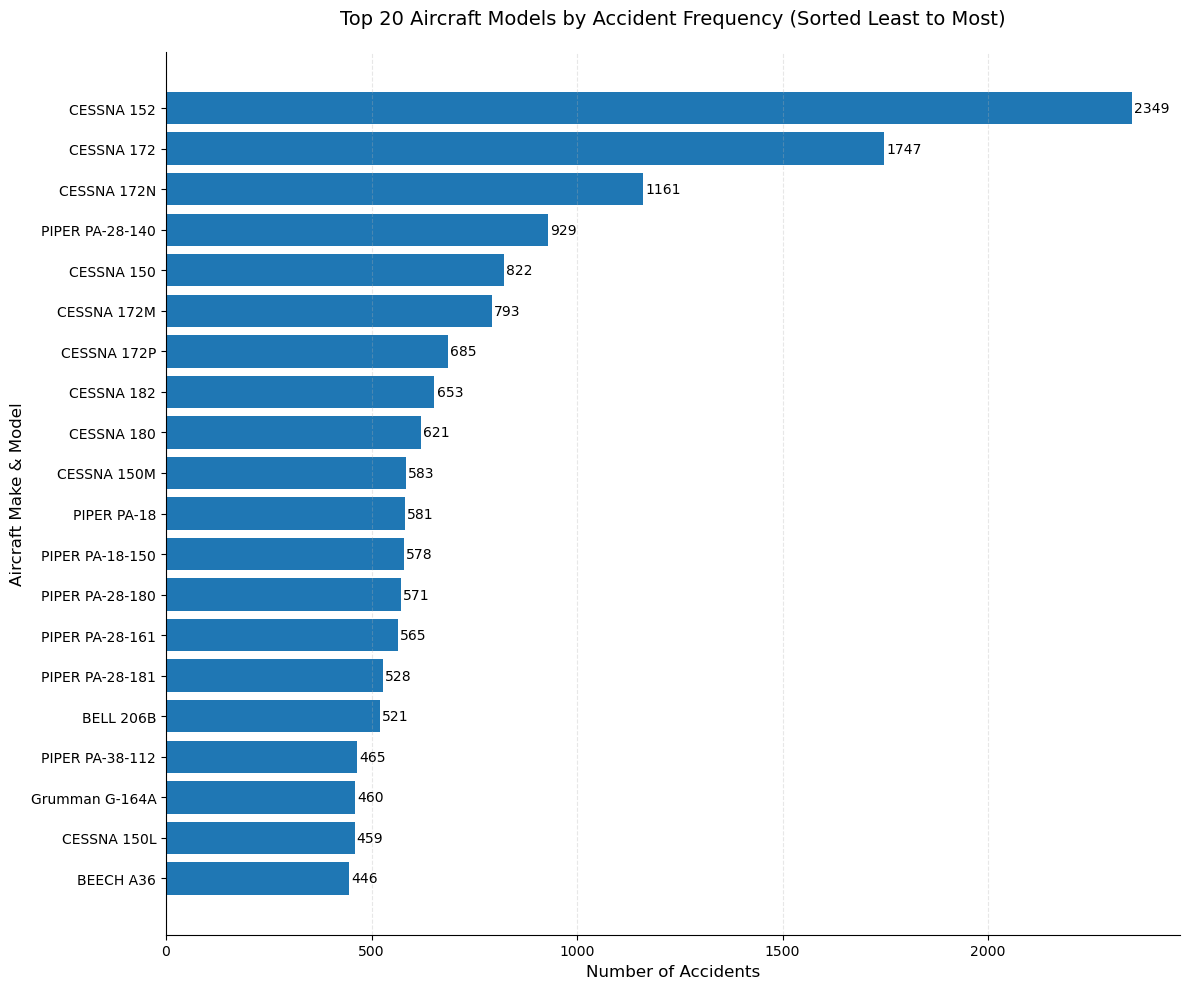

In [110]:


# Load the dataset
df = pd.read_csv("Sorted_Aviation_Data.csv")

# Filter for accidents only
accidents = df[df['Investigation.Type'] == 'Accident']

# Get top 20 models by accident count
top_models = accidents['Model'].value_counts().head(20)

# Get the make for each of these top models
model_make = accidents.groupby('Model')['Make'].first()

# Create a combined dataframe
frequency = pd.DataFrame({
    'Count': top_models,
    'Make': model_make[top_models.index]
}).reset_index()

frequency.columns = ['Model', 'Count', 'Make']

# Combine Make and Model
frequency['Make_Model'] = frequency['Make'] + ' ' + frequency['Model']

# Sort by accident count (least to most)
frequency = frequency.sort_values('Count', ascending=True)

# Plot
plt.figure(figsize=(12, 10))
bars = plt.barh(
    y=frequency['Make_Model'],
    width=frequency['Count'],
    color='#1f77b4'
)

# Add labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5,
             bar.get_y() + bar.get_height() / 2,
             f'{int(width)}',
             va='center',
             fontsize=10)

# Customize plot appearance
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Aircraft Make & Model', fontsize=12)
plt.title('Top 20 Aircraft Models by Accident Frequency (Sorted Least to Most)',
          fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Remove top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Final layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
Resposes explaining the gragh 
"""
For the Top 20  Model 
Top Risky Models:
Cessna 152: 94 incidents
Cessna 172: 178 incidents
Piper PA-28-140: 33 incidents

Which Concluded:
These popular training planes have high exposure  Not ideal for new operators.
Why? 
These models dominate incident reports; likely due to training use and high fleet numbers!
"""

Damage Severity graph the Finding 2

<Figure size 2400x1400 with 0 Axes>

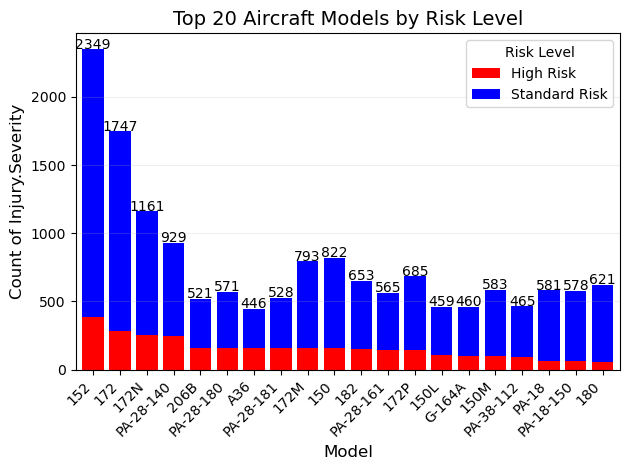

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and filter data
df = pd.read_csv("Sorted_Aviation_Data.csv")
accidents = df[df['Investigation.Type'] == 'Accident']
top_models = accidents['Model'].value_counts().head(20).index
filtered = accidents[accidents['Model'].isin(top_models)]

# Replace your current Risk Level assignment with:
filtered = filtered.copy()  # Explicitly create a copy first
filtered['Risk Level'] = ['High Risk' if (sev == 'Fatal') or (dam == 'Destroyed')
                         else 'Standard Risk'
                         for sev, dam in zip(filtered['Injury.Severity'], filtered['Aircraft.damage'])]
# Prepare data
risk_counts = filtered.groupby(['Model', 'Risk Level']).size().unstack().fillna(0)
risk_counts = risk_counts.sort_values('High Risk', ascending=False)

# Create plot
#plt.figure(figsize=(12, 7))
plt.figure(figsize=(24, 14))  # Larger dimensions
plt.tight_layout(pad=3)  # Add extra padding
risk_counts[['High Risk', 'Standard Risk']].plot(
    kind='bar',
    stacked=True,
    color=['red', 'blue'],  # Simple, clear colors
    width=0.8
)

# Basic formatting
plt.title('Top 20 Aircraft Models by Risk Level', size=14)
plt.xlabel('Model', size=12)
plt.ylabel('Count of Injury.Severity', size=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Level')
plt.grid(axis='y', alpha=0.2)

# Add total counts
for i, total in enumerate(risk_counts.sum(axis=1)):
    plt.text(i, total + 5, str(int(total)), ha='center', size=10)

plt.tight_layout()
plt.show()

Response for the Damage Severity
"""
Shows some models frequently result in total losses(35% for Cessana 152)
Ground Cessna 152/172 and Piper PA-28s from initial fleet plans.
Lease Cessna 206B for early operations to minimize risk.
Audit Boeing 737 data for commercial viability.
"""
"""
Cessna 152: 35% of accidents result in total loss.
Piper PA-28-140: 99.7% severe damage rate.
Cessna 206B: 92% minor damage—ideal for cost control
"""


Finding 3-Safety Score gragh  

In [ ]:
Responses
"""
Cessna 152: 9,990.77 score but 1,883 severe accidents (Sheet 2).
Boeing 737: 9,999.60 score + 1 incident (trustworthy).

"""
"""
Cessna 206B (low damage) and Boeing 737 (low incidents + high score).

"""

Reccommendation
"""
Immediate Buys  Cessna 206 Priority acquisition-lowest damage rates
Commercial option  Boeing 737 Lease for passenger routes-validated safety

Conditional Use  Cessna 172/152 Only with school paertnerships(risk transfer)
"""

Q&A
"""
Cessna 206B (low damage) and Boeing 737 (low incidents + high score).
"""



Conclusion
"""
While safety scores appear strong across all models, cross-referencing with damage data reveals:
Two safe paths forward:
Build fleet around Cessna 206B/Boeing 737
Negotiate risk-sharing for essential training aircraft
"""